In [1]:
 """ Graphs for Chapter 3 and Annexes

Usage:
======
    1. Read all files and write pixel size and pixel numer by image [X]
    2. Intercalibrate images and save them - print 32 images randomly [X]
    3. Define color deconvolution matrix [X]
    4. Deconvolution of astaxanthin redness [X]
    5. Normalise astaxanthin redness between 0 and 1 and save the one dimension image - print the same 32 images than before [X]
    6. Use a threshold to define red pixels, sum optical density levels by image, devide by the pixel_nb*pixelarea [X]
    7. Save a tible with image name associated to the redness index [X]
     
"""

__authors__ = ("Laure Vilgrain", "Jean-Olivier Irisson", "Simon-Martin Schröder")
__contact__ = ("laure.vilgrain@imev-mer.fr", "irisson@normalesup.org", "sms@informatik.uni-kiel.de")
__version__ = "1.0.0"
__date__ = "04-2021" 

In [2]:
import pandas as pd
import numpy as np
import csv
import xarray as xr
import os
import statistics as stat
from matplotlib import pyplot as plt
import copy
import random
import pickle
import sys
import time
import gc

from skimage.io import imread
from skimage.color.colorconv import separate_stains, gray_from_rgb, yuv_from_rgb, yiq_from_rgb, rgb_from_hed, hed_from_rgb
from scipy import linalg
from skimage import io, data, color, exposure, feature, morphology, measure
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu
from matplotlib.colors import hex2color, rgb2hex
from skimage.filters import threshold_otsu

In [3]:
#imgs_names
with open("/home/lvilgrain/complex/ecoplast_clean_dataset/data/imgs_names.txt", "rb") as imgn:   # Unpickling
    imgs_names = pickle.load(imgn)

# imgs_norm_list
with open("/home/lvilgrain/complex/ecoplast_clean_dataset/data/imgs_norm_list.txt", "rb") as imgnrm:   # Unpickling
    imgs_norm_list = pickle.load(imgnrm)

# red_mask_list
with open("/home/lvilgrain/complex/ecoplast_clean_dataset/data/red_mask_list.txt", "rb") as rml:   # Unpickling
    red_mask_list = pickle.load(rml)

In [4]:
# 7. Histogram of OD value

An image is 1920 pixels high, 2560 pixels long and has a total of 4915200 pixels


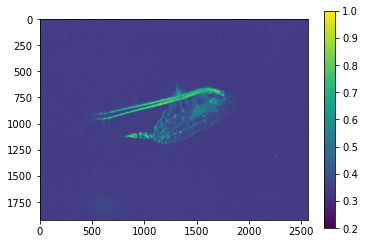

In [5]:
img_ex = io.imread("/home/lvilgrain/complex/ecoplast_clean_dataset/2.Calibrated/" + imgs_names[698])
img_height = img_ex.shape[0]
img_width = img_ex.shape[1]
print('An image is', img_height,'pixels high,', img_width, 'pixels long and has a total of', img_height*img_width, 'pixels')

img_ex_norm = imgs_norm_list[698]
plt.imshow(img_ex_norm, vmin=0.2, vmax = 1)
plt.colorbar() 

In [6]:
# We want to represent values inside this list of 699 images: 
print(type(imgs_norm_list), 'of', len(imgs_norm_list), 'images, with', len(imgs_norm_list[1]),'rows and', len(imgs_norm_list[1][1]),'columns.', 'The first value is:', imgs_norm_list[1][1][1])
print("We want to flatten this list, fist in a list of 699 list by image, and then into a single array with one value by pixel, not matter the image")

<class 'list'> of 699 images, with 1920 rows and 2560 columns. The first value is: 0.36370037766443597
We want to flatten this list, fist in a list of 699 list by image, and then into a single array with one value by pixel, not matter the image


In [7]:
all_img_pixels = []

for i in imgs_norm_list:
    # Flatten the array
    redness_img_flat = i.flatten()
    all_img_pixels.append(redness_img_flat)
len(all_img_pixels)

699

In [8]:
all_pix_arr = np.array(all_img_pixels)
all_pix_arr = all_pix_arr.flatten()

In [9]:
start = time.time()

sample = random.sample(all_img_pixels,699)
sample_arr = np.array(sample)
sample_arr = sample_arr.flatten()

end = time.time()
print(end-start)

316.8713150024414


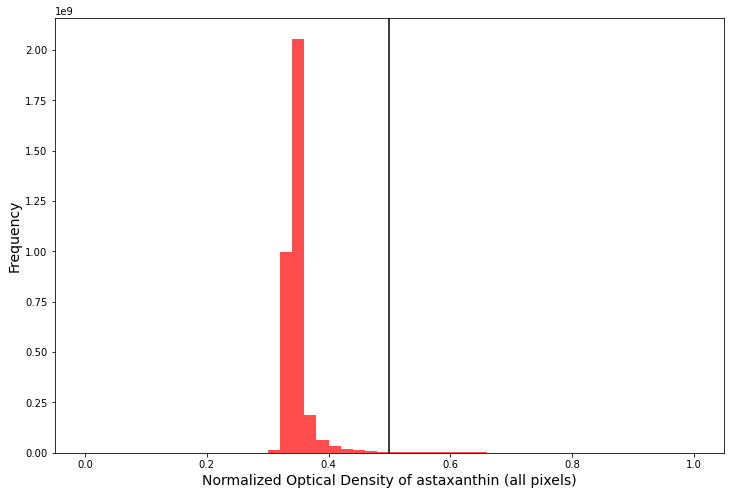

51.616655349731445


In [11]:
plt.close()

start2 = time.time()

fig = plt.figure(figsize=(12, 8))
# Plot the histogram
plt.hist(all_pix_arr , bins=50, color='red', alpha=0.7)
plt.xlabel('Normalized Optical Density of astaxanthin (all pixels)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x = 0.5, color = 'black')
plt.savefig("HistOD.png")
plt.show()
plt.close()

end2 = time.time()
print(end2-start2)

In [12]:
del all_pix_arr
del all_img_pixels

gc.collect()

22